In [19]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# To display plots within the notebook
%matplotlib inline


In [20]:
# Load the Titanic dataset (make sure 'titanic.csv' is in the same folder)
t = pd.read_csv("titanic.csv")

# Display the first 5 rows of the dataset
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Show column data types and non-null counts
t.info()

# Get statistical summary of numerical features
t.describe()

# Check how many null values are in each column
t.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Fill missing values in 'Age' with the median age
t['Age'].fillna(t['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
t['Embarked'].fillna(t['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column because it has too many missing values
t.drop('Cabin', axis=1, inplace=True)

# Drop any remaining rows with missing values
t.dropna(inplace=True)

# Confirm that all missing values are handled
t.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
# Convert 'Sex' into numerical: male = 0, female = 1
t['Sex'] = t['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into dummy/one-hot encoded variables (drop one to avoid multicollinearity)
t = pd.get_dummies(t, columns=['Embarked'], drop_first=True)

# Display updated DataFrame
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [24]:
# Initialize StandardScaler to scale numerical values
scaler = StandardScaler()

# Select numerical columns to scale
num_cols = ['Age', 'Fare']

# Apply standard scaling
t[num_cols] = scaler.fit_transform(t[num_cols])

# Display scaled columns
t[num_cols].head()


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


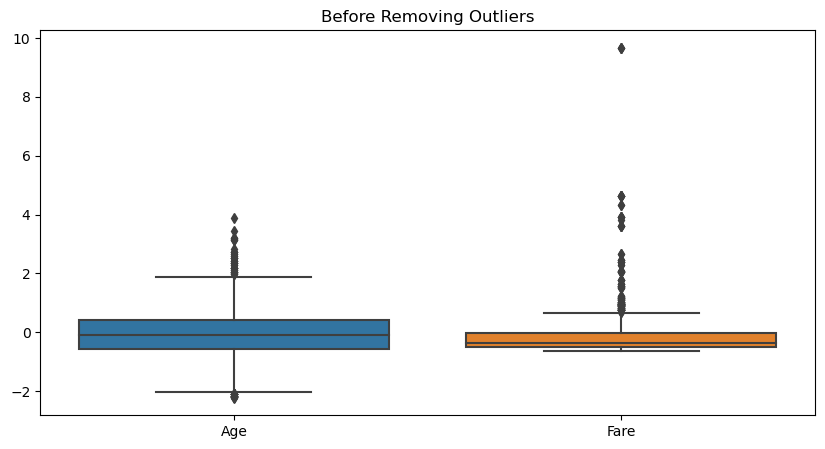

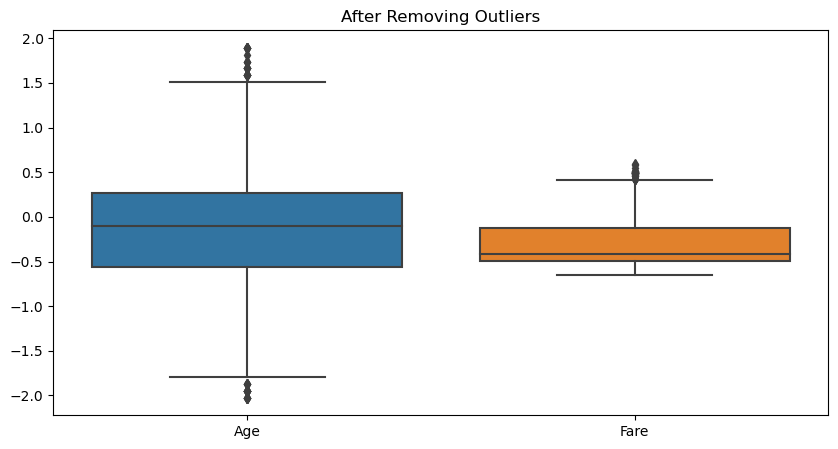

In [25]:
# Visualize outliers using boxplots before removal
plt.figure(figsize=(10, 5))
sns.boxplot(data=t[num_cols])
plt.title("Before Removing Outliers")
plt.show()

# Use IQR method to remove outliers from 'Age' and 'Fare'
for col in num_cols:
    Q1 = t[col].quantile(0.25)
    Q3 = t[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    t = t[(t[col] >= lower) & (t[col] <= upper)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=t[num_cols])
plt.title("After Removing Outliers")
plt.show()


In [26]:
# Final message and DataFrame shape
print("✅ Data Cleaning Complete")
print("Final shape of the cleaned dataset:", t.shape)

# Show a preview of cleaned dataset
t.head()


✅ Data Cleaning Complete
Final shape of the cleaned dataset: (718, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True
5,6,0,3,"Moran, Mr. James",0,-0.104637,0,0,330877,-0.478116,True,False
